In [1]:
import GMesh
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read target mesh
with netCDF4.Dataset('test_hgrid.nc') as nc:
    G = GMesh.GMesh( lon=nc.variables['x'][::2,::2], lat=nc.variables['y'][::2,::2] )
G

<GMesh nj:90 ni:180 shape:(90,180)>

In [3]:
# Read topo data
with netCDF4.Dataset('test_topo.nc') as nc:
    topo_lon = nc.variables['lon'][:].filled(0.)
    topo_lat = nc.variables['lat'][:].filled(0.)
    topo_depth = nc.variables['elevation'][:,:].filled(0.)
topo_eds = GMesh.UniformEDS( topo_lon, topo_lat, topo_depth )
topo_eds

<UniformEDS 2880 x 1440 (0.031Gb)
lon = <RegularCoord n=2880, dx=0.125, rdx=8.0, x0=0.0, io=0, rem=0.0, is-ie=0-2880, periodic=True>
[6.250000e-02 1.875000e-01 3.125000e-01 ... 3.596875e+02 3.598125e+02
 3.599375e+02]
[0.00000e+00 1.25000e-01 2.50000e-01 ... 3.59750e+02 3.59875e+02
 3.60000e+02]
lat = <RegularCoord n=1440, dx=0.125, rdx=8.0, x0=-90, io=-720, rem=0.0, is-ie=0-1440, periodic=False>
[-89.9375 -89.8125 -89.6875 ...  89.6875  89.8125  89.9375]
[-90.    -89.875 -89.75  ...  89.75   89.875  90.   ]
data = (1440, 2880)>

In [4]:
levels = G.refine_loop( topo_eds )

Refine level 0 <GMesh nj:90 ni:180 shape:(90,180)> Hit 27720 out of 4147200 cells dx~1/0 dy~1/0 (0.2472 Mb)
Refine level 1 <GMesh nj:180 ni:360 shape:(180,360)> Hit 76320 out of 4147200 cells dx~1/0 dy~1/0 (0.9888 Mb)
Refine level 2 <GMesh nj:360 ni:720 shape:(360,720)> Hit 269280 out of 4147200 cells dx~1/1 dy~1/1 (3.9551 Mb)
Refine level 3 <GMesh nj:720 ni:1440 shape:(720,1440)> Hit 1045440 out of 4147200 cells dx~1/3 dy~1/3 (15.8203 Mb)
Refine level 4 <GMesh nj:1440 ni:2880 shape:(1440,2880)> Hit 4147200 out of 4147200 cells dx~1/7 dy~1/7 (63.2812 Mb)


In [5]:
# Use nearest neighbor topography to populate the finest grid
levels[-1].project_source_data_onto_target_mesh( topo_eds, use_center=True )

In [6]:
# Quick check (subsampled)
# plt.pcolormesh( levels[-1].height[::8,::8] ); plt.colorbar();

In [7]:
# Now recursively coarsen
while len( levels) > 1:
    levels[-1].coarsenby2( levels[-2] )
    del levels[-1]

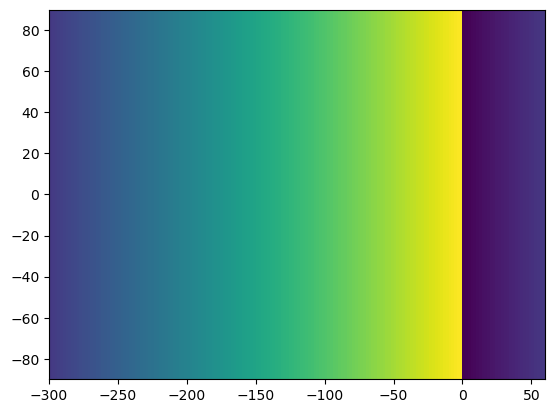

In [8]:
plt.pcolormesh( G.lon, G.lat, G.height );

2.0 2.0


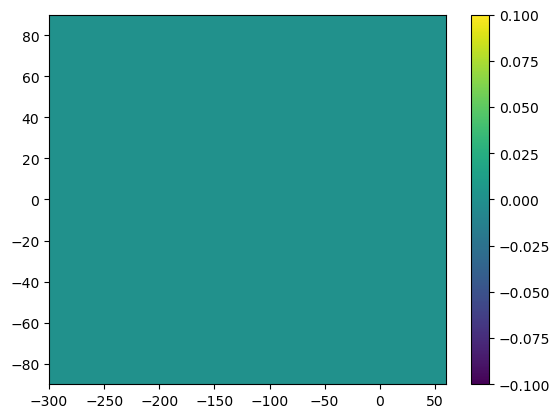

In [9]:
dx, dy = G.lon[0,1] - G.lon[0,0], G.lat[1,0] - G.lat[0,0]
lonc, latc = G.lon[:-1,:-1] + 0.5*dx, G.lat[:-1,:-1] + 0.5*dy # cell center coorindates
print(dx, dy)
plt.pcolormesh( G.lon, G.lat, np.mod( G.height - lonc, 360 ) ); plt.colorbar();